In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_AG_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1,70,4,130.0,322,0,2,109.0,0.0,2.4,2.0,3.0,3.0
1,0,67,3,115.0,564,0,2,160.0,0.0,1.6,2.0,0.0,7.0
2,1,57,2,124.0,261,0,0,141.0,0.0,0.3,1.0,0.0,7.0
3,1,64,4,128.0,263,0,0,105.0,NaN,NaN,2.0,1.0,NaN
4,0,74,2,120.0,269,0,2,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1,52,3,172.0,199,1,0,162.0,0.0,0.5,1.0,0.0,7.0
266,1,44,2,120.0,263,0,0,173.0,0.0,0.0,1.0,0.0,7.0
267,0,56,2,140.0,294,0,2,153.0,0.0,1.3,2.0,0.0,3.0
268,1,57,4,140.0,192,0,0,148.0,0.0,0.4,2.0,0.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
int64		column 3	0
float64		column 4	7
int64		column 5	0
int64		column 6	0
int64		column 7	0
float64		column 8	35
float64		column 9	29
float64		column 10	14
float64		column 11	36
float64		column 12	21
float64		column 13	29


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,270.000000,270.000000,270.000000,263.000000,270.000000,270.000000,270.000000,235.000000,241.000000,256.000000,234.000000,249.000000,241.000000
mean,0.677778,54.433333,3.174074,131.254753,249.659259,0.148148,1.022222,148.374468,0.336100,1.081641,1.602564,0.682731,4.709544
std,0.468195,9.109067,0.950090,17.791190,51.686237,0.355906,0.997891,23.466383,0.473357,1.151544,0.614693,0.962892,1.944724
min,0.000000,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,48.000000,3.000000,120.000000,213.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,1.000000,55.000000,3.000000,130.000000,245.000000,0.000000,2.000000,152.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,1.000000,61.000000,4.000000,140.000000,280.000000,0.000000,2.000000,165.000000,1.000000,1.800000,2.000000,1.000000,7.000000
max,1.000000,77.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


<AxesSubplot:>

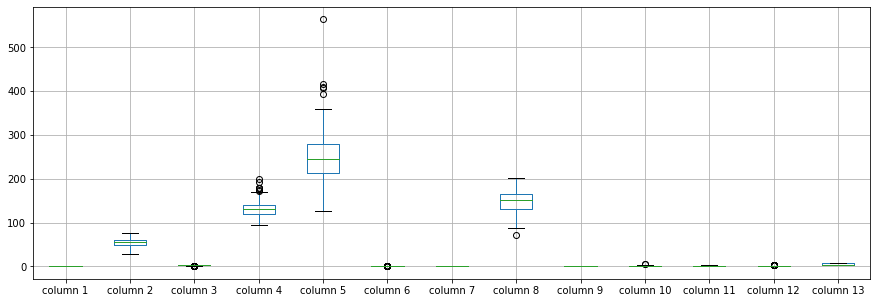

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.677778
column 2      54.433333
column 3       3.174074
column 4     131.254753
column 5     249.659259
column 6       0.148148
column 7       1.022222
column 8     148.374468
column 9       0.336100
column 10      1.081641
column 11      1.602564
column 12      0.682731
column 13      4.709544
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.094401,0.034636,-0.067735,-0.201647,0.042140,0.039253,-0.127245,0.148441,0.087372,0.059118,0.095032,0.371733
column 2,-0.094401,1.000000,0.096920,0.268163,0.220056,0.123458,0.128171,-0.380618,0.127025,0.213967,0.165478,0.335206,0.124110
column 3,0.034636,0.096920,1.000000,-0.038094,0.090465,-0.098537,0.074325,-0.304425,0.385936,0.171220,0.201336,0.218186,0.266708
column 4,-0.067735,0.268163,-0.038094,1.000000,0.173072,0.133194,0.109062,-0.059909,0.082206,0.231911,0.160224,0.103766,0.161886
column 5,-0.201647,0.220056,0.090465,0.173072,1.000000,0.025186,0.167652,-0.035423,0.094511,0.040148,-0.005734,0.120021,0.057458
column 6,0.042140,0.123458,-0.098537,0.133194,0.025186,1.000000,0.053499,0.027015,0.013751,-0.018186,0.032561,0.119283,0.070621
column 7,0.039253,0.128171,0.074325,0.109062,0.167652,0.053499,1.000000,-0.070700,0.087905,0.115890,0.152153,0.119665,0.033921
column 8,-0.127245,-0.380618,-0.304425,-0.059909,-0.035423,0.027015,-0.070700,1.000000,-0.416340,-0.384865,-0.391142,-0.241748,-0.248003
column 9,0.148441,0.127025,0.385936,0.082206,0.094511,0.013751,0.087905,-0.416340,1.000000,0.262072,0.234590,0.172949,0.300989
column 10,0.087372,0.213967,0.171220,0.231911,0.040148,-0.018186,0.115890,-0.384865,0.262072,1.000000,0.582996,0.264803,0.348340


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+66,13+66+66,13+66+66+66,13+66+66+66+66,13+66+66+66+66+66,13+66+66+66+66,13+66+66+66,13+66+66,13+66,13], vae_layer = False, seed = 66)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 582.5742607116699
Epoch: 1 , loss: 581.7179145812988
Epoch: 2 , loss: 580.6126174926758
Epoch: 3 , loss: 583.4744644165039
Epoch: 4 , loss: 583.7029800415039
Epoch: 5 , loss: 583.1692733764648
Epoch: 6 , loss: 588.4448547363281
Epoch: 7 , loss: 582.3894309997559
Epoch: 8 , loss: 582.0236625671387
Epoch: 9 , loss: 583.8659133911133
Epoch: 10 , loss: 582.9802322387695
Epoch: 11 , loss: 584.4897613525391
Epoch: 12 , loss: 583.8938407897949
Epoch: 13 , loss: 581.8691291809082
Epoch: 14 , loss: 579.943286895752
Epoch: 15 , loss: 575.6074409484863
Epoch: 16 , loss: 572.8656005859375
Epoch: 17 , loss: 569.395092010498
Epoch: 18 , loss: 559.6203994750977
Epoch: 19 , loss: 536.2819843292236
Epoch: 20 , loss: 497.4710216522217
Epoch: 21 , loss: 465.07740211486816
Epoch: 22 , loss: 453.2814407348633
Epoch: 23 , loss: 428.77574920654297
Epoch: 24 , loss: 422.96302604675293
Epoch: 25 , loss: 409.52428817749023
Epoc

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.0
column 2      48.0
column 3       2.0
column 4     130.0
column 5     245.0
column 6       0.0
column 7       2.0
column 8     180.0
column 9       0.0
column 10      0.2
column 11      2.0
column 12      0.0
column 13      3.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0,0,0,0.0,0,0,0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
1,0,0,0,0.0,0,0,0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
2,0,0,0,0.0,0,0,0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
3,0,0,0,0.0,0,0,0,0.0,-0.487019,1.671015,0.000000,0.0,1.653119
4,0,0,0,0.0,0,0,0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0,0,0,0.0,0,0,0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
266,0,0,0,0.0,0,0,0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
267,0,0,0,0.0,0,0,0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
268,0,0,0,0.0,0,0,0,0.0,0.000000,0.000000,0.000000,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(612.8255393915298, 5414.752392307519)

In [17]:
NRMS=numerator/denominator
NRMS


0.11317701992470457

In [18]:
new_df.iloc[66,:]

column 1       1.000000
column 2      51.000000
column 3       4.000000
column 4     140.000000
column 5     261.000000
column 6       0.000000
column 7       2.000000
column 8     186.000000
column 9       0.253902
column 10      0.000000
column 11      0.864258
column 12      0.000000
column 13      2.382267
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1,70,4,130.0,322,0,2,109.0,0.000000,2.400000,2.000000,3.0,3.000000
1,0,67,3,115.0,564,0,2,160.0,0.000000,1.600000,2.000000,0.0,7.000000
2,1,57,2,124.0,261,0,0,141.0,0.000000,0.300000,1.000000,0.0,7.000000
3,1,64,4,128.0,263,0,0,105.0,0.512981,1.871015,2.000000,1.0,8.653119
4,0,74,2,120.0,269,0,2,121.0,1.000000,0.200000,1.000000,1.0,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1,52,3,172.0,199,1,0,162.0,0.000000,0.500000,1.000000,0.0,7.000000
266,1,44,2,120.0,263,0,0,173.0,0.000000,0.000000,1.000000,0.0,7.000000
267,0,56,2,140.0,294,0,2,153.0,0.000000,1.300000,2.000000,0.0,3.000000
268,1,57,4,140.0,192,0,0,148.0,0.000000,0.400000,2.000000,0.0,6.000000


In [20]:
imputations[-1].to_excel("Sheart_AG_5(imp).xlsx", index=False, header=False)